### Notebook 2

Hello 4604 and 5604. Welcome to week two! 

In this notebook we will:

1. Get practice using and interpreting K-nearest neighbors. We will also build intuition for this method
2. Learn how to tune a hyperparameter, which is an important skill for machine learning practitioners
3. Gain exposure to the scikit-learn API. Scikit-learn is a common toolkit for machine learning in Python

In [20]:
# To get started, please import the latest versions of numpy, pandas and sklearn
# You will also need to install and load matplotlib, a common plotting library in Python

import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

# configure matplotlib to show plots in the notebook itself
%matplotlib inline 

#### Dataset

In this notebook, we will be using the [Pima Indians Diabetes Dataset](https://www.kaggle.com/uciml/pima-indians-diabetes-database). The data consists of patient records with a number of health attributes, and a binary label indicating if the patient has diabetes or does not have diabetes. Note that "all patients here are females at least 21 years old of Pima Indian heritage."

In [11]:
df = pd.read_csv('diabetes.csv') #Load the dataset

features = df.drop('Outcome', axis=1) # And split the dataset into features and labels
labels = df["Outcome"]  # print out the dataset and take a look at the data

# Print out the dataset here. How many features are there in the dataset? 

# [Type your answer here]

# Print out the dataset here. How many dimensions are there in the dataset? 

# [Type your answer here]

In [13]:
low_dim = features[['Glucose', 'BloodPressure']]   # Let's go ahead and start in two dimensions to build intuition

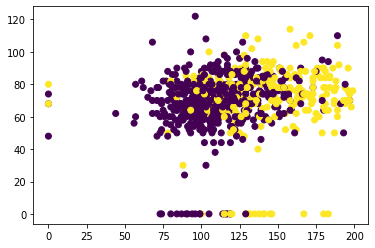

In [16]:
# Plot Glucose and BloodPressure in two dimensions, with Glucose along the x-axis and BloodPressure along the y-axis
# In your plot, use color to indicate if a patient has diabetes or does not have diabetes 

# [TODO: write code here to display a scatter plot]

# hint: Use matplotlib's scatter function
# https://matplotlib.org/3.3.1/gallery/shapes_and_collections/scatter.html

**Question**

Based on your plot, do you think that KNN would do a good job identifying if a patient has diabetes based on their Glucose and BloodPressure? Please briefly explain your reasoning?

[Type your answer here]

**Question**

Describe a point on your plot where you think KNN would incorrectly classify a patient as having or not having diabetes (when using K=2). Explain why you think KNN would have a difficult time making such a classification (You don't have to perfectly describe the location of a single point on the plot, just describe your intution about why some point might be misclassified.  You can describe the location of the point, for instance, as "Along the top of the plot there is a point..."). 

[Type your answer here]

#### Hello, sklearn 

The next cell shows you how to call a classifier from the sklearn API. The sklearn library does a good job maintaining consitent APIs for all of its classifiers. So you will see this pattern again and again when using the library this semester

In [24]:
from sklearn.neighbors import KNeighborsClassifier   # import the classifier

knn = KNeighborsClassifier(n_neighbors=2)  # Instantiate the classifier object

knn.fit(low_dim, labels)   # Fit the classifier 

knn.score(low_dim, labels)   # Report the accuracy of the classifier

0.81640625

In [3]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(features, labels)
    
    #Compute accuracy
    accuracy[i] = knn.score(features, labels)

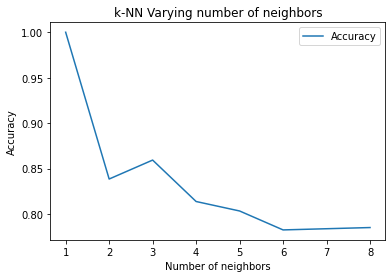

In [4]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, accuracy, label='Accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

Text(0.5, 1.0, '2-Class classification (k = 3)')

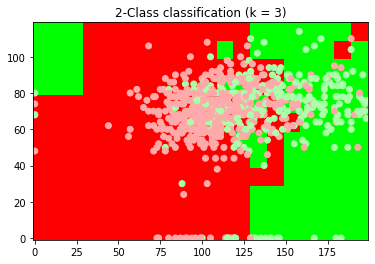

In [5]:
from matplotlib.colors import ListedColormap

n_neighbors = 3

#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

#Fit the model
knn.fit(features[['Glucose', 'BloodPressure']], labels)

knn.score(features[['Glucose', 'BloodPressure']], labels)

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])

cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

X = features[['Glucose', 'BloodPressure']].to_numpy()
y = labels

h = 10  # step size in the mesh

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_bold)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_light)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("2-Class classification (k = %i)" % (n_neighbors))


In [6]:
- Hyper parameter

SyntaxError: invalid syntax (<ipython-input-6-f976b7e27ac5>, line 1)

In [ ]:
# 5604 : Bias variance tradeoffs